In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sn
import json
import glob, os
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from numpy.random import seed
from scipy.stats import kruskal

from termcolor import colored

In [2]:
def define_plot_pos(ax):
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_zlabel('z (m)')
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)
    ax.set_zlim(0,6)
    plt.legend()
    plt.show()

In [3]:
# plot settings

lw = 1.5

fs = 13

params = {
    'axes.labelsize': fs,
    'font.size': fs,
    'legend.fontsize': fs,
    'xtick.labelsize': fs,
    'ytick.labelsize': fs,
    'text.usetex': False,
    'figure.figsize': [6, 3],
    'boxplot.boxprops.linewidth' : lw,
    'boxplot.whiskerprops.linewidth' : lw,
    'boxplot.capprops.linewidth' : lw,
    'boxplot.medianprops.linewidth' : lw,
    'text.usetex' : True,
    'font.family' : 'serif',

   }
mpl.rcParams.update(params)

# Plots for the learning curve experiment

In [4]:
def dfFromJSON(file):
    with open(file) as f:
        temp = []
        for line in f:
            temp.append(json.loads(line))
            
    df = pd.io.json.json_normalize(temp[0]['allLogs'])
    df.columns = df.columns.map(lambda x: x.split("*.")[-1])
    return df

In [5]:
def appendToLogs(file, log, _type):
    df = dfFromJSON(file)
    log[_type].append(df)

In [6]:
path_to_folder = "/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Learning_Curve/"
subjects = glob.glob(path_to_folder + "*/")

logs = {}
for curr in subjects:
    logs[curr] = []
    
subjects.sort()
subjects

['/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Learning_Curve/sub01_Controller/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Learning_Curve/sub01_MotionCapture/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Learning_Curve/sub02_Controller/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Learning_Curve/sub02_MotionCapture/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Learning_Curve/sub03_Controller/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Learning_Curve/sub03_MotionCapture/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Learning_Curve/sub04_Controller/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Learning_Curve/sub04_Motio

In [7]:
# used to remove outliers

subjects.remove(subjects[5])
subjects.remove(subjects[4])

logs = {}
for curr in subjects:
    logs[curr] = []
    
subjects

['/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Learning_Curve/sub01_Controller/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Learning_Curve/sub01_MotionCapture/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Learning_Curve/sub02_Controller/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Learning_Curve/sub02_MotionCapture/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Learning_Curve/sub04_Controller/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Learning_Curve/sub04_MotionCapture/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Learning_Curve/sub05_Controller/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Learning_Curve/sub05_Motio

In [8]:
EXP_N_THOMAS = 4
EXP_N = 5

for subject in subjects:
    print(subject)
    files = glob.glob(subject+"*.json")
    files.sort()
    
    if len(files) != EXP_N and len(files) != EXP_N_THOMAS:
        print('wrong number of experiments!')
        break
    for file in files:
        logs[subject].append(dfFromJSON(file))

/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Learning_Curve/sub01_Controller/
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Learning_Curve/sub01_MotionCapture/
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Learning_Curve/sub02_Controller/
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Learning_Curve/sub02_MotionCapture/
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Learning_Curve/sub04_Controller/
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Learning_Curve/sub04_MotionCapture/
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Learning_Curve/sub05_Controller/
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Learning_Curve/sub05_MotionCapture/
/Volumes/GoogleDrive

In [9]:
fields = ['first motion', 'last motion', 'first remote', 'last remote']

sub_remote = [x for x in subjects if 'Controller' in x]
sub_motion = [x for x in subjects if 'Motion' in x]

logs['first motion'] = [logs[x][0] for x in sub_motion]
logs['last motion'] = [logs[x][-1] for x in sub_motion]
logs['first remote'] = [logs[x][0] for x in sub_remote]
logs['last remote'] = [logs[x][-1] for x in sub_remote]

3800

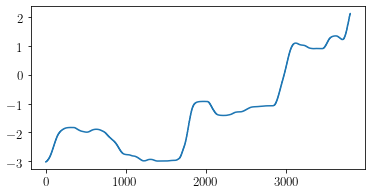

In [10]:
logs['first motion'][1] = logs['first motion'][1].iloc[:3800]

# test = logs['first motion'][1].drop([logs['first motion'][1].index[3800] , logs['first motion'][1].index[len(logs['first motion'][1])]])

plt.plot(logs['first motion'][1]['dronePosition.z'])


len(logs['first motion'][1])

# %store logs

In [11]:
def t_test_kruskal(X, Y):
    
    # Kruskal-Wallis H-test
    
    # seed the random number generator
    seed(1)
    
    # compare samples
    stat, p = kruskal(X, Y)
    
    return [stat, p]

def str_from_p(p):
    
    if p<0.01:
        add_str = ' !!!!!!!!!!'
    elif p<0.05:
        add_str = ' !!!!!!'
    elif p<0.1:
        add_str = ' !'
    else:
        add_str = ''
        
    return add_str

def print_p(p):
    
    col = None
    
    if p<0.01:
        col = 'green'
    elif p<0.05:
        col = 'yellow'
    elif p<0.1:
        col = 'red'
        
    if col is not None:
        print(colored('p = '+ str(p) + str_from_p(p), col))
    else:
        print('p = '+ str(p) + str_from_p(p))

def runBasicAnalysis(f):
    
    var = {}

    var['means'] = []
    var['stds'] = []

    for i in fields:
        var[i] = []
        for j in logs[i]:
            var[i].append(f(j))
        print(i)
        print(var[i])

        var['means'].append(np.mean(var[i]))
        var['stds'].append(np.std(var[i]))

        print('mean = ', var['means'][-1])
        print('std = ', var['stds'][-1])

        print()
        
    for idx,i in enumerate(fields):
        for j in fields[idx+1:]:
            if i != j:
                
                t, p = t_test_kruskal(var[i],var[j])
                
                print ()
                print (i,j)
                print_p(p)
            
    var['diff mot'] = 1-np.array(var['last motion'])/np.array(var['first motion'])
    var['diff rem'] = 1-np.array(var['last remote'])/np.array(var['first remote'])

    print()
    print('motion ratio')
    print(var['diff mot'])
    print(np.mean(var['diff mot']))
    print(np.std(var['diff mot']))
    print()
    print('remote ratio')
    print(var['diff rem'])
    print(np.mean(var['diff rem']))
    print(np.std(var['diff rem']))

    t, p = t_test_kruskal(var['diff mot'], var['diff rem'])

    print()
    print_p(p)
            
    var['diff first'] = 1-np.array(var['first motion'])/np.array(var['first remote'])
    var['diff last'] = 1-np.array(var['last motion'])/np.array(var['last remote'])

    print()
    print('firts ratio')
    print(var['diff first'])
    print(np.mean(var['diff first']))
    print(np.std(var['diff first']))
    print()
    print('last ratio')
    print(var['diff last'])
    print(np.mean(var['diff last']))
    print(np.std(var['diff last']))

    t, p = t_test_kruskal(var['diff first'], var['diff last'])

    print()
    print_p(p)
            
    return var

def basic_plot(var):
    
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(131)
    ax.bar([0, 1, 2, 3],
       var['means'],
       yerr=var['stds'])

    plt.xticks(range(4), fields, rotation = 10)

    ax = fig.add_subplot(132)
    ax.bar([0, 1],
       [np.mean(var['diff mot']), np.mean(var['diff rem'])],
       yerr=[np.std(var['diff mot']), np.std(var['diff rem'])])
    
    plt.xticks(range(2), ['motion', 'remote'], rotation = 10)

    ax = fig.add_subplot(133)
    ax.bar([0, 1],
       [np.mean(var['diff first']), np.mean(var['diff last'])],
       yerr=[np.std(var['diff first']), np.std(var['diff last'])])
    
    plt.xticks(range(2), ['first', 'last'], rotation = 10)

In [12]:
def moving_average(data_set, periods=3, fill_with_zeros = True):
    
    if data_set.size < periods:
        return data_set
    
    if isinstance(data_set, pd.DataFrame):
        print('a')
        data_set.index = range(len(data_set))

    weights = np.ones(periods) / periods
    
    ma = np.convolve(data_set, weights, mode='valid')

    if fill_with_zeros:
        fill_before = np.ones(int(np.ceil((len(data_set) - len(ma))/2))) * data_set[0]
        fill_after = np.ones(int(np.floor((len(data_set) - len(ma))/2))) * data_set[-1]
        ma = np.hstack([fill_before, ma, fill_after])
    
    return ma

def filter_position(df, steps):
    
    l = moving_average(df['dronePosition.x'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.x'] = np.append([l[0]]*(steps-1), l)
    l = moving_average(df['dronePosition.y'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.y'] = np.append([l[0]]*(steps-1), l)
    l = moving_average(df['dronePosition.x'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.x'] = np.append([l[0]]*(steps-1), l)
    return df

def running_average(signal, steps):
    
    l = moving_average(signal, periods=steps, fill_with_zeros = False)
    out = np.append([l[0]]*(steps-1), l)
    return out

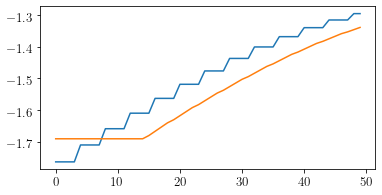

In [13]:
logs1 = logs.copy()

logs1['first remote'][0]['dronePositionFiltered.x'] = running_average(logs1['first remote'][0]['dronePosition.x'], 15)

plt.plot(logs1['first remote'][0]['dronePosition.x'][0:50])
plt.plot(logs1['first remote'][0]['dronePositionFiltered.x'][0:50])

# Plot Trajectories

2140
3800
4220
2984
4387
4928
4088
4090
4660
1480
3396
4408
2728
3181
4296
4542
2940
2851
2936
5894
3180
3140
7520
5928
4572
3984
6179
2044
2399
2016
3876
4076
5111
3052
2629
4766


3800

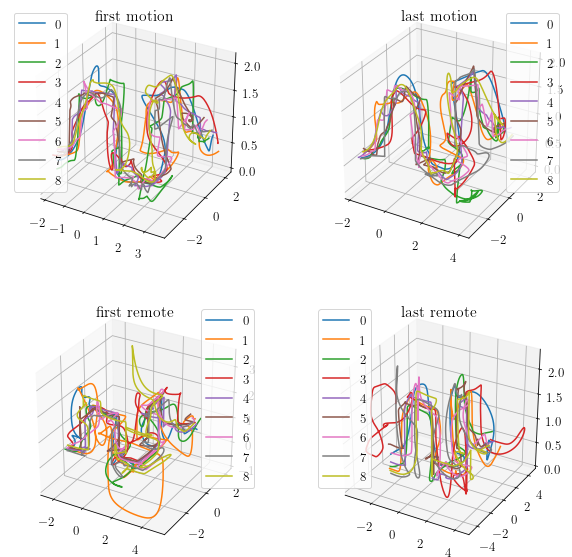

In [14]:

params = {
    'figure.figsize': [10, 10],

   }
mpl.rcParams.update(params)

plt.figure()

for idx,i in enumerate(fields):
    ax = plt.subplot(2, 2, 1+idx, projection='3d')
    for idx1,log in enumerate(logs[i]):
        ax.plot(log['dronePosition.x'],log['dronePosition.z'],log['dronePosition.y'], label = str(idx1))
        print(len(log))
    plt.legend()
    plt.title(fields[idx])
#     define_plot_pos(ax)
len(logs['first motion'][1])

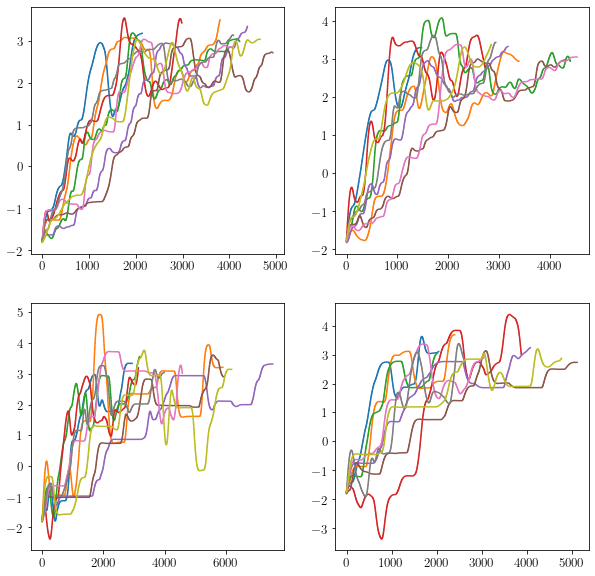

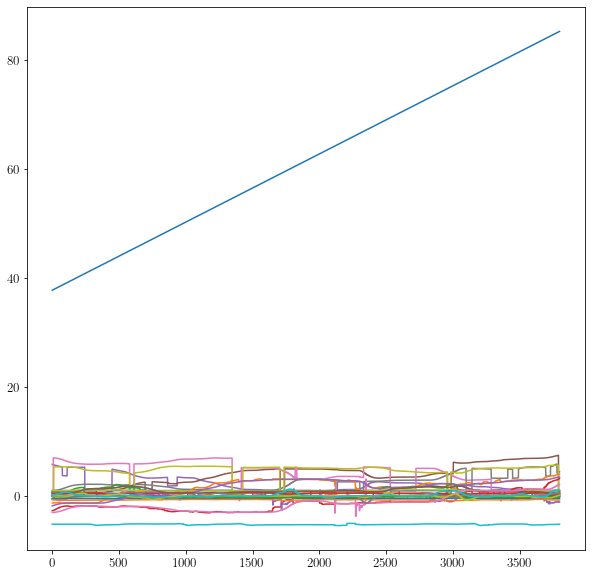

In [15]:
plt.figure()

for idx,i in enumerate(fields):
    ax = plt.subplot(2, 2, 1+idx)
    for idx1,log in enumerate(logs[i]):
        ax.plot(log['dronePosition.x'])

plt.figure()

plt.plot(logs['first motion'][1][:3800])

# Time analysis

In [16]:
def compTime(df):
    return df['absoluteTime'].iloc[-1] - df['absoluteTime'].iloc[0]

In [17]:
time = runBasicAnalysis(compTime)

first motion
[26.73883819580078, 47.487369537353516, 52.7387809753418, 37.28846740722656, 54.826730728149414, 61.58778953552246, 51.0882511138916, 51.13821887969971, 58.23855209350586]
mean =  49.01477760738797
std =  10.196245186281294

last motion
[18.48773193359375, 42.438934326171875, 55.088836669921875, 34.08905029296875, 39.787872314453125, 53.738616943359375, 56.83905029296875, 36.73876953125, 35.638214111328125]
mean =  41.427452935112846
std =  11.618992155139125

first remote
[36.68891906738281, 73.68862915039062, 39.73820495605469, 39.23795127868652, 94.03952026367188, 74.08895683288574, 57.13888931274414, 49.789329528808594, 77.23839950561523]
mean =  60.18319998847114
std =  19.26101363267273

last remote
[25.53936767578125, 29.975521087646484, 25.188079833984375, 48.438262939453125, 50.988128662109375, 63.9388427734375, 38.138580322265625, 32.87721252441406, 59.626495361328125]
mean =  41.63449902004666
std =  13.78146303850499


first motion last motion
p = 0.23323022278

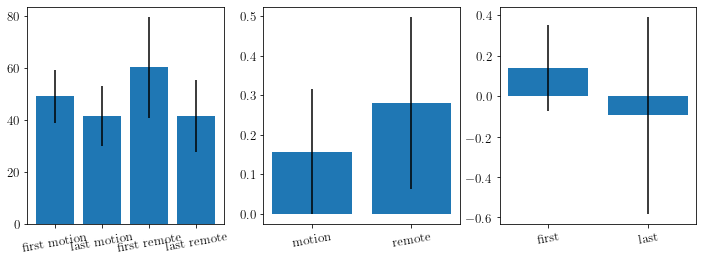

In [18]:
basic_plot(time)

# Distance Analysis

In [19]:
def compDist(df):
    
    steps = 10
    
    df['dronePositionFiltered.x'] = running_average(df['dronePosition.x'], steps)
    df['dronePositionFiltered.y'] = running_average(df['dronePosition.y'], steps)
    df['dronePositionFiltered.z'] = running_average(df['dronePosition.z'], steps)
    
    x = df['dronePositionFiltered.x'].values
    y = df['dronePositionFiltered.y'].values
    z = df['dronePositionFiltered.z'].values

    dx = np.diff(x)
    dy = np.diff(y)
    dz = np.diff(z)

    dd = np.sqrt(dx**2+dy**2+dz**2)
    d = np.sum(dd)

    return d

In [20]:
dist = runBasicAnalysis(compDist)

first motion
[15.98972282475311, 19.1777130764286, 22.31855332241707, 17.96494570721543, 16.363344621467206, 16.809082127723983, 17.90026799383409, 16.644707575850145, 19.494031178687354]
mean =  18.073596492041887
std =  1.8916901736698728

last motion
[13.31047505639871, 18.91328878255961, 25.94867135780242, 22.021034077629242, 15.301398107391059, 16.013081638542097, 18.498482054697696, 20.48739833485118, 15.458738723781288]
mean =  18.439174237072592
std =  3.720273382565281

first remote
[22.324165494490163, 47.55272516313187, 27.296154193201396, 26.429951555178604, 23.59043715530307, 26.766195403641024, 28.819758429636657, 22.411877011676065, 37.13760414983424]
mean =  29.147652061788122
std =  7.760241352642701

last remote
[16.300804799333633, 18.913434669361628, 16.521486751991354, 39.33784439306216, 17.505522909543476, 21.627921471488406, 19.671156363529324, 26.494663735001417, 21.808760102751325]
mean =  22.020177244006973
std =  6.820067262716887


first motion last motion
p

/Users/lis/anaconda3/envs/bidir/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/lis/anaconda3/envs/bidir/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/lis/anaconda3/envs/bidir/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

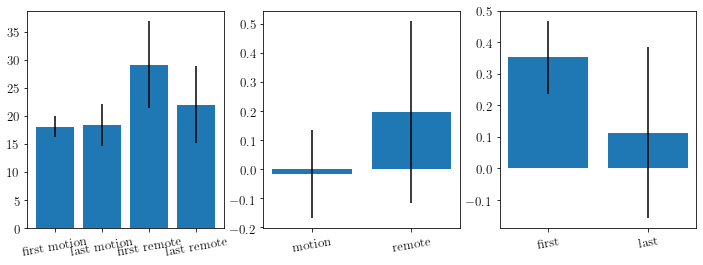

In [21]:
basic_plot(dist)

# Velocity Analysis

In [22]:
def compVel(df):
    x = df['dronePositionFiltered.x'].values
    y = df['dronePositionFiltered.y'].values
    z = df['dronePositionFiltered.z'].values
    t = df['absoluteTime'].values

    dx = np.diff(x)
    dy = np.diff(y)
    dz = np.diff(z)
    dt = np.diff(t)
    
    vx = np.append([0],dx/dt)
    vy = np.append([0],dy/dt)
    vz = np.append([0],dz/dt)
    
    df['droneVelocity.x'] = vx
    df['droneVelocity.y'] = vy
    df['droneVelocity.z'] = vz
    
    steps = 20    
    
    df['droneVelocityFiltered.x'] = running_average(df['droneVelocity.x'], steps)
    df['droneVelocityFiltered.y'] = running_average(df['droneVelocity.y'], steps)
    df['droneVelocityFiltered.z'] = running_average(df['droneVelocity.z'], steps)

    dv = np.sqrt(df['droneVelocityFiltered.x'][100:]**2+df['droneVelocityFiltered.y'][100:]**2+df['droneVelocityFiltered.z'][100:]**2)
    
    v = np.mean(dv)
    
    return v

In [23]:
vel = runBasicAnalysis(compVel)

first motion
[0.5914655502685631, 0.3966098525935303, 0.42224456411118905, 0.4696252298017714, 0.2991898834986133, 0.26814663326859206, 0.342798400128234, 0.3230888208583262, 0.33652588395147487]
mean =  0.3832994242755883
std =  0.09443820204604729

last motion
[0.7082632927919577, 0.4466226105355526, 0.47096298796043873, 0.625612682187399, 0.3839282141175893, 0.29544490800563034, 0.3226276545085635, 0.5557734657423912, 0.4253860700249964]
mean =  0.4705135428749465
std =  0.12930312815332673

first remote
[0.6048814400906103, 0.6341347159495576, 0.6837602868147377, 0.6715884255602592, 0.24915828741993426, 0.3564514622938567, 0.5060106263899103, 0.4493126763989051, 0.47349571494404086]
mean =  0.5143104039846458
std =  0.14031517590863443

last remote
[0.645198148003594, 0.635482840516, 0.6588149829340826, 0.8013585478356915, 0.33589714666761533, 0.33931569435189307, 0.5085288287248177, 0.7898589029202127, 0.354552401349232]
mean =  0.5632230548114598
std =  0.1755935978670183


first

/Users/lis/anaconda3/envs/bidir/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/lis/anaconda3/envs/bidir/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/lis/anaconda3/envs/bidir/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

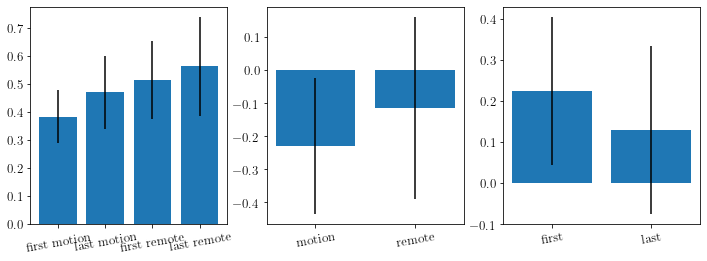

In [24]:
basic_plot(vel)

# Acceleration Analysis

In [25]:
def compAcc(df):
    vx = df['droneVelocityFiltered.x'].values
    vy = df['droneVelocityFiltered.y'].values
    vz = df['droneVelocityFiltered.z'].values
    t = df['absoluteTime'].values
    
    dvx = np.diff(vx)
    dvy = np.diff(vy)
    dvz = np.diff(vz)
    dt = np.diff(t)
    
    ax = np.append([0],dvx/dt)
    ay = np.append([0],dvy/dt)
    az = np.append([0],dvz/dt)
    
    df['droneAcceleration.x'] = ax
    df['droneAcceleration.y'] = ay
    df['droneAcceleration.z'] = az
    
    steps = 30    
    
    df['droneAccelerationFiltered.x'] = running_average(df['droneAcceleration.x'], steps)
    df['droneAccelerationFiltered.y'] = running_average(df['droneAcceleration.y'], steps)
    df['droneAccelerationFiltered.z'] = running_average(df['droneAcceleration.z'], steps)

    da = np.sqrt(df['droneAccelerationFiltered.x'][100:]**2+df['droneAccelerationFiltered.y'][100:]**2+df['droneAccelerationFiltered.z'][100:]**2)
    
    a = np.mean(da)

    return a

In [26]:
acc = runBasicAnalysis(compAcc)

first motion
[0.6262592333715965, 0.5009339545325944, 0.8170690847522056, 0.6014993422071747, 0.6339664852885869, 0.4363224994296056, 0.6428538751267902, 0.5634635091197591, 0.34400076110007966]
mean =  0.5740409716587103
std =  0.12832729437072993

last motion
[0.6935333493624882, 0.5515874714924929, 0.911646071893495, 1.0202026105814126, 0.7105799614817411, 0.5422221599843919, 0.5412648713853637, 0.9994129873101419, 0.43387623212663523]
mean =  0.7115917461797958
std =  0.20517070691457476

first remote
[0.8179730420974849, 0.6890353640729231, 0.87104228422705, 0.8843567576521152, 0.2712746642485197, 0.4877454520288943, 0.606891666005453, 0.5515010879218111, 0.5596204661505985]
mean =  0.6377156427116499
std =  0.18904778274406048

last remote
[0.7457047362862306, 0.7660319311546149, 0.7721134977606467, 0.9817429323651226, 0.36787722388214456, 0.4521359256637946, 0.6252243581723516, 1.0243986643935286, 0.4324860642361804]
mean =  0.6853017037682906
std =  0.22191488603631718


first 

/Users/lis/anaconda3/envs/bidir/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/lis/anaconda3/envs/bidir/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/lis/anaconda3/envs/bidir/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

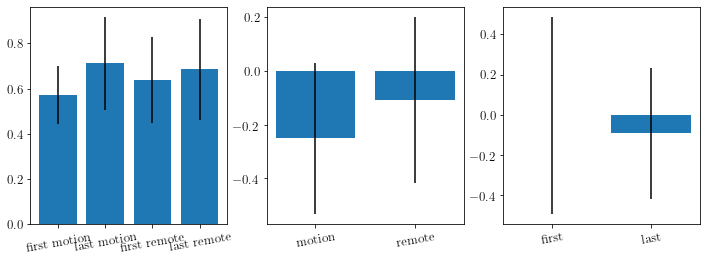

In [27]:
basic_plot(acc)

# Jerk Analysis

In [28]:
def compJerk(df):
    ax = df['droneAccelerationFiltered.x'].values
    ay = df['droneAccelerationFiltered.y'].values
    az = df['droneAccelerationFiltered.z'].values
    t = df['absoluteTime'].values
    
    dax = np.diff(ax)
    day = np.diff(ay)
    daz = np.diff(az)
    dt = np.diff(t)
    
    jx = np.append([0],dax/dt)
    jy = np.append([0],day/dt)
    jz = np.append([0],daz/dt)
    
    df['droneJerk.x'] = jx
    df['droneJerk.y'] = jy
    df['droneJerk.z'] = jz
    
    steps = 40    
    
    df['droneJerkFiltered.x'] = running_average(df['droneJerk.x'], steps)
    df['droneJerkFiltered.y'] = running_average(df['droneJerk.y'], steps)
    df['droneJerkFiltered.z'] = running_average(df['droneJerk.z'], steps)

    dj = np.sqrt(df['droneJerkFiltered.x'][100:]**2+df['droneJerkFiltered.y'][100:]**2+df['droneJerkFiltered.z'][100:]**2)
    
    
    j = np.mean(dj)

    return j

In [29]:
jerk = runBasicAnalysis(compJerk)

/Users/lis/anaconda3/envs/bidir/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/lis/anaconda3/envs/bidir/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/lis/anaconda3/envs/bidir/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

first motion
[1.322450539991678, 1.1647612441273885, 2.267610592462352, 1.2805465811439398, 1.9504241331184142, 1.1497659673238672, 1.6717749738185856, 1.5655025750472022, 0.6987563484567377]
mean =  1.452399217276685
std =  0.44249752588135216

last motion
[1.294368628816663, 1.188418081046969, 2.440149225828725, 2.239030378255799, 2.0569458134272276, 1.546473452050761, 1.3644658022080893, 2.657912206904177, 0.8842246116743919]
mean =  1.741332022245867
std =  0.5865058172079529

first remote
[1.7101052294816639, 1.2158228418982926, 1.759313586063058, 1.726223532960491, 0.574171264364218, 0.9836955495754648, 1.1482867583882286, 1.113160929116499, 1.0043641604774616]
mean =  1.248349316925042
std =  0.3824046112807294

last remote
[1.5538321319313084, 1.5457041607177497, 1.61463918370713, 1.826863924945043, 0.8415444930858282, 0.9506634557176598, 1.275919056220123, 2.0065321167916434, 0.8193883394608696]
mean =  1.3816763180641507
std =  0.40883548360396527


first motion last motion
p

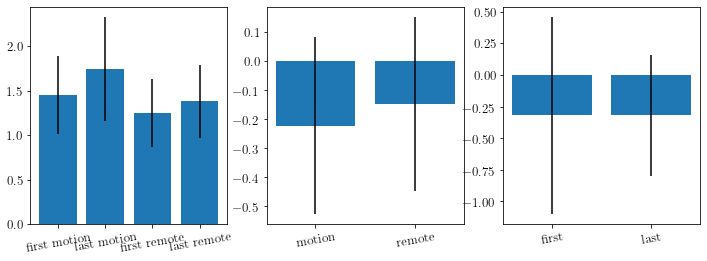

In [30]:
basic_plot(jerk)

# Energy Analysis

In [31]:
def compEnergy(df):
    df['controlInput'] = np.sqrt(df['controlSpeed.x']**2+df['controlSpeed.y']**2+df['controlSpeed.z']**2)
    return df['controlInput'].sum()

In [32]:
energy = runBasicAnalysis(compEnergy)

first motion
[1239.5910846412821, 1530.039984321833, 1784.6959661965552, 1498.5062137707678, 1294.151292170006, 1355.08608580699, 1430.2174444757497, 1348.3983949034632, 1499.4806082593627]
mean =  1442.2407860606677
std =  153.10517147858474

last motion
[957.7049617705087, 1571.5765210763047, 2404.7405022746298, 1872.054675515924, 1180.3701977327062, 1313.4349275258705, 1503.5814595666889, 2085.943548541085, 1153.5933020698055]
mean =  1560.333344008169
std =  450.1525863970278

first remote
[1544.0944067908558, 2914.416685378667, 2092.377663748999, 2058.0607901833646, 1398.4296726660089, 1723.174082535012, 2264.1453032200493, 1614.8294185176094, 2564.4254463977195]
mean =  2019.3281632709206
std =  474.66654042354367

last remote
[1176.6233673598217, 1270.9011819037419, 1216.1056489233024, 3045.3018555135895, 1106.3507669027608, 1503.413353880545, 1318.6086929897883, 1982.5479859445677, 1414.2047182609645]
mean =  1559.3397301865646
std =  579.4642425052594


first motion last motio

/Users/lis/anaconda3/envs/bidir/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


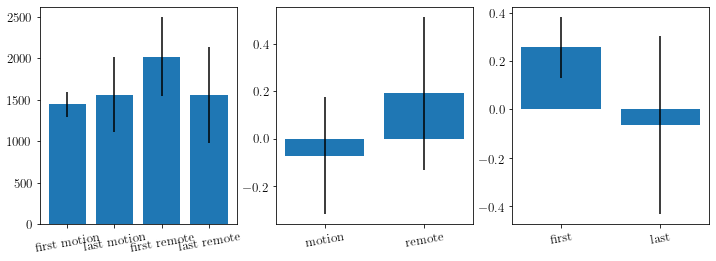

In [33]:
basic_plot(energy)

In [34]:
def compDEnergy(df):
    dEnergy = np.abs(np.diff(df['controlInput']))
    return np.sum(dEnergy)

In [35]:
dEnergy = runBasicAnalysis(compDEnergy)

first motion
[63.89708104891014, 89.59649988095778, 161.96121083294986, 73.19188788080086, 128.14105535087612, 103.44326571888045, 115.07824596998108, 104.22463341107994, 39.59255556175874]
mean =  97.68071507291056
std =  34.34974332632524

last motion
[37.69626524692417, 91.0589173332078, 189.60518874651882, 114.75514273677597, 99.8256009518023, 125.47133302390064, 100.89041694191835, 168.73911989907597, 31.493585535797457]
mean =  106.61506337954683
std =  49.30909126215154

first remote
[36.25574636062577, 56.51785748187329, 42.77649556192982, 39.10303337568175, 44.5820557374351, 41.14229531099092, 57.85738242298294, 44.74842045634919, 45.44391913462612]
mean =  45.380800649166105
std =  6.897385333404425

last remote
[24.458194125910843, 29.334643758668413, 25.211552041192338, 49.580605748153786, 31.782774589126284, 36.95387011414377, 34.78064349163815, 37.207696489186695, 28.019872921378827]
mean =  33.03665036437768
std =  7.339038663926072


first motion last motion
p = 0.82528

<BarContainer object of 2 artists>

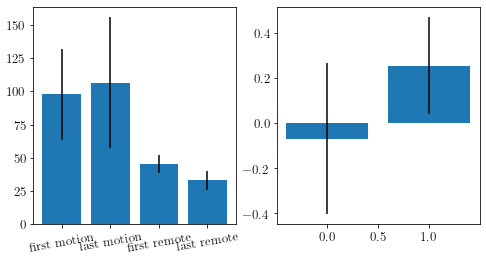

In [36]:
size = 6

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(121)
ax.bar([0, 1, 2, 3],
   dEnergy['means'],
   yerr=dEnergy['stds'])

plt.xticks(range(4), fields, rotation = 10)

ax = fig.add_subplot(122)
ax.bar([0, 1],
   [np.mean(dEnergy['diff mot']), np.mean(dEnergy['diff rem'])],
   yerr=[np.std(dEnergy['diff mot']), np.std(dEnergy['diff rem'])])

# Collision Analysis

In [37]:
coll_df = pd.read_csv('/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Learning_Curve/Bidir - learning collisions - Sheet1.csv')
coll_df

,Index,Run,Subject,Interface,Collisions
0,1,1,1,Motion,0
1,2,2,1,Motion,0
2,3,3,1,Motion,0
3,4,4,1,Motion,0
4,5,5,1,Motion,0
...,...,...,...,...,...
95,96,1,10,Remote,1
96,97,2,10,Remote,2
97,98,3,10,Remote,2
98,99,4,10,Remote,0


In [39]:
coll = {}

coll['motion'] = coll_df[coll_df['Interface']=='Motion']
coll['remote'] = coll_df[coll_df['Interface']=='Remote']


coll['first motion'] = coll['motion'][coll['motion']['Run']==1]
coll['last motion'] = coll['motion'][coll['motion']['Run']==5]
coll['first remote'] = coll['remote'][coll['remote']['Run']==1]
coll['last remote'] = coll['remote'][coll['remote']['Run']==5]
# logs['last motion'] = [logs[x][-1] for x in sub_motion]
# logs['first remote'] = [logs[x][0] for x in sub_remote]
# logs['last remote'] = [logs[x][-1] for x in sub_remote]
# print(coll['motion'])


consider all runs

mean motion =  0.7
std motion =  0.9529760045804524
mean remote =  1.04
std remote =  1.497753419666418

total motion =  35
total remote =  52

p = 0.439880620610147

consider first runs

mean motion =  0.9
std motion =  0.9944289260117534
mean remote =  0.7
std remote =  0.9486832980505138

total motion =  9
total remote =  7

p = 0.640316414374904

consider last runs

mean motion =  0.9
std motion =  1.1005049346146119
mean remote =  1.7
std remote =  1.70293863659264

total motion =  9
total remote =  17

p = 0.23625713016062885

FIRST LAST REMOTE

p = 0.11759468643332538


Text(0.5, 1.0, 'Collisions - last run')

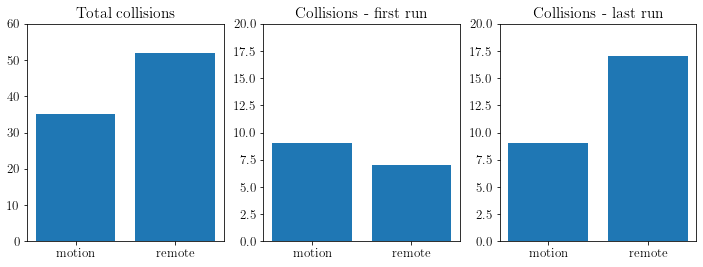

In [42]:
def compute_mean_std_collisions(data_m, data_r):
    mean_m = data_m['Collisions'].mean()
    std_m = data_m['Collisions'].std()
    mean_r = data_r['Collisions'].mean()
    std_r = data_r['Collisions'].std()

    print('mean motion = ', mean_m)
    print('std motion = ', std_m)
    print('mean remote = ', mean_r)
    print('std remote = ', std_r)
    print('')
    print('total motion = ', data_m['Collisions'].sum())
    print('total remote = ', data_r['Collisions'].sum())
    print('')

    t, p = t_test_kruskal(data_m['Collisions'],data_r['Collisions'])

    print_p(p)
    
print('')
print('consider all runs')
print('')
compute_mean_std_collisions(coll['motion'], coll['remote'])
    
print('')
print('consider first runs')
print('')
compute_mean_std_collisions(coll['first motion'], coll['first remote'])
    
print('')
print('consider last runs')
print('')
compute_mean_std_collisions(coll['last motion'], coll['last remote'])

t, p = t_test_kruskal(coll['first remote']['Collisions'],coll['last remote']['Collisions'])

print('')
print('FIRST LAST REMOTE')
print('')
print_p(p)


    
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131)
ax.bar([0, 1],
   [coll['motion']['Collisions'].sum(), coll['remote']['Collisions'].sum()])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 60])
plt.title('Total collisions')

ax = fig.add_subplot(132)
ax.bar([0, 1],
   [coll['first motion']['Collisions'].sum(), coll['first remote']['Collisions'].sum()])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 20])
plt.title('Collisions - first run')

ax = fig.add_subplot(133)
ax.bar([0, 1],
   [coll['last motion']['Collisions'].sum(), coll['last remote']['Collisions'].sum()])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 20])
plt.title('Total collisions')
plt.title('Collisions - last run')

# TEST

In [ ]:
plt.figure()
l = 5000

inter = 'first motion'
inter2 = 'first remote'

sc = len(logs[inter][0]['dronePositionFiltered.x'][0:l])/len(logs[inter2][0]['dronePositionFiltered.x'][0:l])

# plt.plot(logs[inter][0]['dronePosition.x'][0:l])
plt.plot(logs[inter][0]['dronePositionFiltered.x'][0:l])
plt.plot(np.arange(0,len(logs[inter2][0]['dronePositionFiltered.x'][0:l]))*sc, logs[inter2][0]['dronePositionFiltered.x'][0:l])
plt.grid(True)

# print(logs['first remote'][0]['dronePosition.x'][0:500])

plt.figure()
# plt.plot(logs[inter][0]['droneVelocity.x'][0:l])
plt.plot(logs[inter][0]['droneVelocityFiltered.x'][0:l])
plt.plot(np.arange(0,len(logs[inter2][0]['dronePositionFiltered.x'][0:l]))*sc, logs[inter2][0]['droneVelocityFiltered.x'][0:l])
plt.yticks([-1, 0, 1])
plt.grid(True)

plt.figure()
# plt.plot(logs[inter][0]['droneAcceleration.x'][0:l])
plt.plot(logs[inter][0]['droneAccelerationFiltered.x'][0:l])
plt.plot(np.arange(0,len(logs[inter2][0]['dronePositionFiltered.x'][0:l]))*sc, logs[inter2][0]['droneAccelerationFiltered.x'][0:l])
plt.yticks([-1, 0, 1])
plt.grid(True)

plt.figure()
# plt.plot(logs[inter][0]['droneJerk.x'][0:l])
plt.plot(logs[inter][0]['droneJerkFiltered.x'][0:l])
plt.plot(np.arange(0,len(logs[inter2][0]['dronePositionFiltered.x'][0:l]))*sc, logs[inter2][0]['droneJerkFiltered.x'][0:l])
plt.grid(True)